In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df=pd.read_csv('cleaner.csv')

In [4]:
df.head()

,Unnamed: 0,Consumer_complaint_narrative,Product
0,0,cra violaton mine knowledge va ...,"Credit reporting, credit repair services, or o..."
1,1,account listed fraudulent foe year somone usin...,"Credit reporting, credit repair services, or o..."
2,2,ive noticed recent credit report contains late...,"Credit reporting, credit repair services, or o..."
3,3,may concern accepted offer put disaster aid...,"Credit reporting, credit repair services, or o..."
4,4,equifa put credit card wife got name credit re...,"Credit reporting, credit repair services, or o..."


In [5]:
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [6]:
MAX_SEQUENCE_LENGTH=400
EMBEDDING_DIM=100

In [7]:
token=Tokenizer()

In [8]:
df['Consumer_complaint_narrative']=df['Consumer_complaint_narrative'].astype('str')

In [9]:
token.fit_on_texts(df['Consumer_complaint_narrative'].values)

In [10]:
word_index=token.word_index

In [11]:
len(token.word_index)+1

92373

In [12]:
print(word_index)

{'account': 1, 'payment': 2, 'loan': 3, 'credit': 4, 'would': 5, 'bank': 6, 'time': 7, 'told': 8, 'day': 9, 'received': 10, 'company': 11, 'call': 12, 'called': 13, 'information': 14, 'card': 15, 'money': 16, 'month': 17, 'back': 18, 'pay': 19, 'amount': 20, 'report': 21, 'get': 22, 'one': 23, 'never': 24, 'said': 25, 'sent': 26, 'due': 27, 'made': 28, 'letter': 29, 'paid': 30, 'also': 31, 'number': 32, 'could': 33, 'year': 34, 'check': 35, 'debt': 36, 'service': 37, 'fee': 38, 'phone': 39, 'email': 40, 'interest': 41, 'balance': 42, 'make': 43, 'asked': 44, 'since': 45, 'still': 46, 'mortgage': 47, 'charge': 48, 'well': 49, 'customer': 50, 'late': 51, 'even': 52, 'date': 53, 'issue': 54, 'u': 55, 'help': 56, 'fund': 57, 'need': 58, 'complaint': 59, 'car': 60, 'transaction': 61, 'request': 62, 'new': 63, 'contacted': 64, 'statement': 65, 'know': 66, 'please': 67, 'reporting': 68, 'take': 69, 'another': 70, 'name': 71, 'claim': 72, 'first': 73, 'consumer': 74, 'stated': 75, 'document': 

In [13]:
print('Found %s unique tokens.' % len(word_index))

Found 92372 unique tokens.


In [14]:
X=token.texts_to_sequences(df['Consumer_complaint_narrative'].values)

In [15]:
X=pad_sequences(X,maxlen=MAX_SEQUENCE_LENGTH)

In [16]:
print('Shape of data tensor',X.shape)

Shape of data tensor (180000, 400)


In [17]:
Y=pd.get_dummies(df['Product']).values

In [18]:
print('Shape of label tensor',Y.shape)

Shape of label tensor (180000, 9)


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=68)

In [21]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(144000, 400) (144000, 9)
(36000, 400) (36000, 9)


In [22]:
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,SpatialDropout1D,Dropout
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

In [ ]:
model=Sequential()
model.add(Embedding(92507,EMBEDDING_DIM,input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(9,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 100)          9250700   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 400, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 1161      
Total params: 9,369,109
Trainable params: 9,369,109
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
epochs=9
batch_size=64
history=model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping
                                                                                                     (monitor='val_loss'
                                                                                                     ,patience=2,min_delta=0.0001)])

Epoch 1/9
2025/2025 [==============================] - 1227s 604ms/step - loss: 1.6096 - accuracy: 0.3910 - val_loss: 0.7429 - val_accuracy: 0.7694
Epoch 2/9
2025/2025 [==============================] - 1214s 600ms/step - loss: 0.6972 - accuracy: 0.7813 - val_loss: 0.5606 - val_accuracy: 0.8251
Epoch 3/9
2025/2025 [==============================] - 1210s 598ms/step - loss: 0.4928 - accuracy: 0.8468 - val_loss: 0.5091 - val_accuracy: 0.8388
Epoch 4/9
2025/2025 [==============================] - 1208s 597ms/step - loss: 0.4044 - accuracy: 0.8728 - val_loss: 0.5092 - val_accuracy: 0.8404
Epoch 5/9
2025/2025 [==============================] - 1202s 593ms/step - loss: 0.3438 - accuracy: 0.8902 - val_loss: 0.4996 - val_accuracy: 0.8406
Epoch 6/9
2025/2025 [==============================] - 1209s 597ms/step - loss: 0.2949 - accuracy: 0.9060 - val_loss: 0.5193 - val_accuracy: 0.8398
Epoch 7/9
2025/2025 [==============================] - 1219s 602ms/step - loss: 0.2473 - accuracy: 0.9211 - val_

In [ ]:
accu=model.evaluate(X_test,y_test)
print('Test Set Loss',accu[0])
print('Test Set Accuracy',accu[1])

1125/1125 [==============================] - 98s 87ms/step - loss: 0.5450 - accuracy: 0.8373
Test Set Loss 0.5450457334518433
Test Set Accuracy 0.8372777700424194


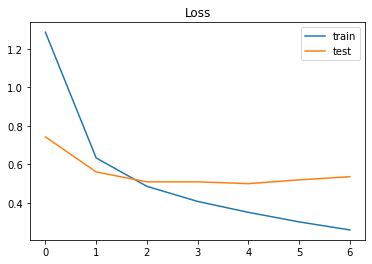

In [ ]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

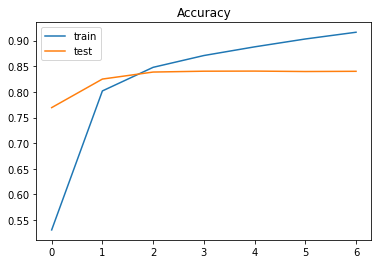

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
new_complaint = ['i requested loan for my daughter for her education but i didnt get any assistance']
seq = token.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['Vehicle loan or lease',                                                 
'Debt collection',                                                                 
'Checking or savings account',                                 
'Money transfer, virtual currency, or money service',                          
'Mortgage',                                                                        
'Payday loan, title loan, or personal loan',                                   
'Credit reporting, credit repair services, or other personal consumer reports',
'Student loan',                                                                    
'Credit card or prepaid card']
print(pred)
print(labels[np.argmax(pred)])

[[0.00816479 0.0028868  0.00928926 0.04278151 0.01314803 0.00318195
  0.01941325 0.89758414 0.00355024]]
Student loan


In [23]:
from keras.layers import Bidirectional

In [ ]:
model=Sequential()
model.add(Embedding(92507,EMBEDDING_DIM,input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(128,dropout=0.2,recurrent_dropout=0.2)))
model.add(Dense(9,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 400, 100)          9250700   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 400, 100)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               234496    
_________________________________________________________________
dense (Dense)                (None, 9)                 2313      
Total params: 9,487,509
Trainable params: 9,487,509
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
epochs=9
batch_size=64
history=model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping
                                                                                                     (monitor='val_loss'
                                                                                                     ,patience=2,min_delta=0.0001)])

Epoch 1/9
2025/2025 [==============================] - 2589s 1s/step - loss: 1.4535 - accuracy: 0.4511 - val_loss: 0.9419 - val_accuracy: 0.6963
Epoch 2/9
2025/2025 [==============================] - 2564s 1s/step - loss: 0.7925 - accuracy: 0.7608 - val_loss: 0.6701 - val_accuracy: 0.8001
Epoch 3/9
2025/2025 [==============================] - 2565s 1s/step - loss: 0.6018 - accuracy: 0.8205 - val_loss: 0.5841 - val_accuracy: 0.8203
Epoch 4/9
2025/2025 [==============================] - 2562s 1s/step - loss: 0.5037 - accuracy: 0.8467 - val_loss: 0.5483 - val_accuracy: 0.8301
Epoch 5/9
2025/2025 [==============================] - 2591s 1s/step - loss: 0.4106 - accuracy: 0.8737 - val_loss: 0.5708 - val_accuracy: 0.8306
Epoch 6/9
2025/2025 [==============================] - 2638s 1s/step - loss: 0.3654 - accuracy: 0.8865 - val_loss: 0.5371 - val_accuracy: 0.8352
Epoch 7/9
2025/2025 [==============================] - 2627s 1s/step - loss: 0.3023 - accuracy: 0.9045 - val_loss: 0.5458 - val_ac

In [21]:
accu=model.evaluate(X_test,y_test)
print('Test Set Loss',accu[0])
print('Test Set Accuracy',accu[1])

1125/1125 [==============================] - 212s 187ms/step - loss: 0.5617 - accuracy: 0.8374
Test Set Loss 0.5617093443870544
Test Set Accuracy 0.8373888731002808


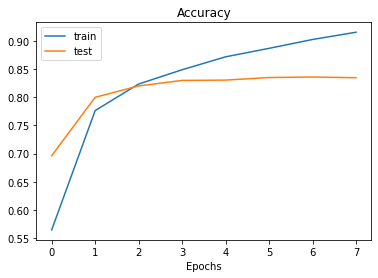

In [24]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Epochs')
plt.legend()
plt.show()

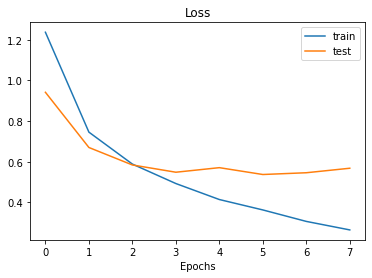

In [25]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [32]:
model=Sequential()
model.add(Embedding(92507,200,input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(128,dropout=0.2,recurrent_dropout=0.2)))
model.add(Dense(9,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 400, 200)          18501400  
_________________________________________________________________
spatial_dropout1d_6 (Spatial (None, 400, 200)          0         
_________________________________________________________________
bidirectional_6 (Bidirection (None, 256)               336896    
_________________________________________________________________
dense_6 (Dense)              (None, 9)                 2313      
Total params: 18,840,609
Trainable params: 18,840,609
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
epochs=10
batch_size=64
history=model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping
                                                                                                     (monitor='val_loss'
                                                                                                     ,patience=2,min_delta=0.0001)])

Epoch 1/10
2025/2025 [==============================] - 11398s 6s/step - loss: 1.3383 - accuracy: 0.5165 - val_loss: 0.9436 - val_accuracy: 0.6826
Epoch 2/10
2025/2025 [==============================] - 11393s 6s/step - loss: 0.7637 - accuracy: 0.7632 - val_loss: 0.6107 - val_accuracy: 0.8118
Epoch 3/10
2025/2025 [==============================] - 11332s 6s/step - loss: 0.5167 - accuracy: 0.8420 - val_loss: 0.5267 - val_accuracy: 0.8355
Epoch 4/10
2025/2025 [==============================] - 11394s 6s/step - loss: 0.4098 - accuracy: 0.8722 - val_loss: 0.5145 - val_accuracy: 0.8354
Epoch 5/10
2025/2025 [==============================] - 11389s 6s/step - loss: 0.3341 - accuracy: 0.8953 - val_loss: 0.5198 - val_accuracy: 0.8398
Epoch 6/10
2025/2025 [==============================] - 11392s 6s/step - loss: 0.2691 - accuracy: 0.9137 - val_loss: 0.5464 - val_accuracy: 0.8388


In [34]:
accu=model.evaluate(X_test,y_test)
print('Test Set Loss',accu[0])
print('Test Set Accuracy',accu[1])

1125/1125 [==============================] - 754s 664ms/step - loss: 0.5447 - accuracy: 0.8413
Test Set Loss 0.5447068810462952
Test Set Accuracy 0.8413055539131165


In [37]:
model=Sequential()
model.add(Embedding(92507,200,input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(9,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 400, 200)          18501400  
_________________________________________________________________
spatial_dropout1d_8 (Spatial (None, 400, 200)          0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 128)               168448    
_________________________________________________________________
dense_8 (Dense)              (None, 9)                 1161      
Total params: 18,671,009
Trainable params: 18,671,009
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
epochs=10
batch_size=64
history=model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping
                                                                                                     (monitor='val_loss'
                                                                                                     ,patience=2,min_delta=0.0001)])

Epoch 1/10
2025/2025 [==============================] - 6237s 3s/step - loss: 1.3680 - accuracy: 0.5139 - val_loss: 1.0086 - val_accuracy: 0.6853
Epoch 2/10
2025/2025 [==============================] - 6229s 3s/step - loss: 0.8613 - accuracy: 0.7333 - val_loss: 0.6313 - val_accuracy: 0.8078
Epoch 3/10
2025/2025 [==============================] - 6226s 3s/step - loss: 0.5333 - accuracy: 0.8370 - val_loss: 0.5466 - val_accuracy: 0.8293
Epoch 4/10
2025/2025 [==============================] - 6225s 3s/step - loss: 0.4256 - accuracy: 0.8686 - val_loss: 0.5199 - val_accuracy: 0.8358
Epoch 5/10
2025/2025 [==============================] - 6226s 3s/step - loss: 0.3456 - accuracy: 0.8917 - val_loss: 0.5177 - val_accuracy: 0.8384
Epoch 6/10
2025/2025 [==============================] - 6230s 3s/step - loss: 0.2801 - accuracy: 0.9112 - val_loss: 0.5253 - val_accuracy: 0.8388
Epoch 7/10
2025/2025 [==============================] - 6229s 3s/step - loss: 0.2260 - accuracy: 0.9266 - val_loss: 0.5666 -

In [39]:
accu=model.evaluate(X_test,y_test)
print('Test Set Loss',accu[0])
print('Test Set Accuracy',accu[1])

1125/1125 [==============================] - 413s 347ms/step - loss: 0.5661 - accuracy: 0.8372
Test Set Loss 0.5660597085952759
Test Set Accuracy 0.8372499942779541
